# Lesson - Statistics and Probability X: Z-scores


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
# Explore AmesHousing1.txt dataset
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### The Range

Consider, these two distributions of numerical values:
$\begin{equation}
A = [4,4,4,4]
\end{equation}$
$\begin{equation}
B = [0,8,0,8]
\end{equation}$

We need a measure to summarize the variability of these two distributions. The summary metrics we've learned so far don't tell us anything about variability. The mean, the median, and the mode of distribution of A are all 4. And distribution B has a mean and a median of 4, and no mode. 

One intuitive way to measure the variability of a distribution is to find the difference between the maximum and the minimum value. Both the maximum and the minimum of distribution A is 4, so the variability of distribution A is 0:
$$\begin{equation}
max(A) - min(A) = 4 - 4 = 0
\end{equation}$$

We call this measure of variability the **range**. So the range of distribution A is 0. The range of distribution B is 8:

$$\begin{equation}
max(B) - min(B) = 8 - 0 = 8
\end{equation}$$

In more general terms, the range of distribution X, where X can be any distribution of real numbers, is:

$$\begin{equation}
range(X) = max(X) - min(X)
\end{equation}$$

**Exercise**

- Write a function that takes in an array of numerical values and returns the range of that array.
- Using the function, measure the range of the `SalePrice` variable for each year of sales `Yr Sold` column.

- Store the measures in a dictionary named `range_by_year`. 
 - The keys should be the individual years, and the dictionary values should be the ranges. 
 - This is how the dictionary should look like: {2010: 598868, 2009: 575100, 2008: 601900,...}.

Using the measures of variability , asses the truth value of the following sentences:

- Prices had the greatest variability in 2008.
- Prices variability had a peak in 2007, then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009).

In [3]:
# Function that determines range of an array
def get_range(array):
    '''Function that determines range of an array'''
    range = array.max() - array.min()
    return range

# Measure reange of Sales Price for each year of sales

range_by_year = dict(get_range(houses.groupby('Yr Sold')['SalePrice']))

range_by_year


{2006: 590000, 2007: 715700, 2008: 601900, 2009: 575100, 2010: 598868}

Above, we can also write following code to create dictionary `range_by_yar`
```
range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])
```    

Prices had the greatest variability in 2008. **(False)**

Prices variability had a peak in 2007, then the variability started to decrease until 2010 when there was a short increase in variability compared to the previous year (2009). **(True)**

### The Average Distance

The problem with the range is that it considers only two values in the distribution — the minimum and the maximum value. Consider this distribution:
$$\begin{equation}
C = [1,1,1,1,1,1,1,1,1,21]
\end{equation}$$

We can see there's not much variability in distribution, we have nine values of 1, and a single value of 21. Intuitively, we'd expect the variability of distribution to be greater than 0 because there is some variability after all, but not much greater than 0. Despite our expectations, the range indicates that the variability of distribution C is 0. This is signficantly greater than 0 and doesn't seem like a reasonable measure of variability for distribution C. The root of the problem is that the range considers only the two extreme values, and this makes it extremely sensitive to outliers. To get a more balanced measure of variability for distribution C, we need to take into account each value in the distribution.

To take into account each value when measuring variability we could:

- Take a reference value, and measure the distance of each value in the distribution from that reference value.
- We can take the mean of the distribution as a reference value.
- Then, we measure the distance between each value in the distribution and the mean.
Find the mean of the distances.
- We first need to sum up all the distances.
- Then we need to divide the total by the number of distances.

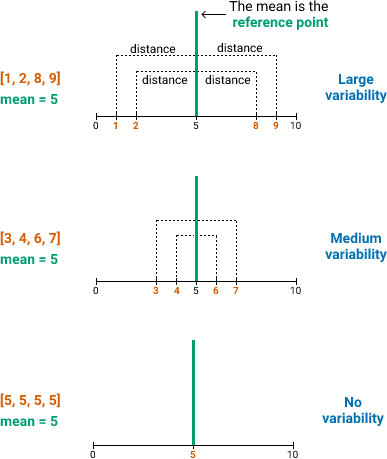

By measuring the distance of each value relative to a reference point and then taking the mean of the distances, we practically measure how much the values of a distribution vary on average with respect to that reference point.

It's also very easy to define algebraically this method for any population of values $[x_1, x_2, ..., x_N]$ with mean 
μ: 
$$\begin{equation}
average\ distance = \frac{
\overbrace{(x_1 -\ \mu)}^{distance} +
\overbrace{(x_2 -\ \mu)}^{distance} + ... +
\overbrace{(x_N - \mu)}^{distance}
}
{N} = \frac{
\overbrace{
\displaystyle\sum_{i = 1}^{n}
\overbrace{(x_i - \mu)}^{distance}
}^{total\ distance}
}
{N}
\end{equation}$$


**Exercise**


Write a function that takes in a numerical array and returns the average distance (as explained above). Inside the function's definition:

- Compute the mean of the array.
- Initialize an empty list.
- Loop through the values of the array. For each iteration:
- Compute the distance between the current value and the mean. Use value - mean every time, as indicated by the formula.
- Append the distance to the list we initialized before the loop.
- At the end of the loop, the list should contain all the distances.
- Return the mean of the list.
- Compute the average distance for distribution C  using the function, and assign the result to a variable named `avg_distance`.

In [4]:
def get_avg_distance(array):
    ''' Calculates average distance of values from mean, in a distribution'''
    distance_from_mean = []
    mean = sum(array)/ len(array)
    
    for value in array:
        distance = value - mean
        distance_from_mean.append(distance)
    return sum(distance_from_mean)/ len(distance_from_mean) 
   

In [5]:
C = [1,1,1,1,1,1,1,1,1,21]
avg_distance = get_avg_distance(C)
avg_distance

# Above will always give us 0 because the sum of distance below and above the mean is always equal

0.0

### Mean Absolute Deviation

Above, the average distance was 0. This is because the mean is the balance point of the distribution and, as we've learned, the total distance of the values that are above the mean is the same as the total distance of the values below the mean. The mean 
μ of the distribution C is 3, so we have:

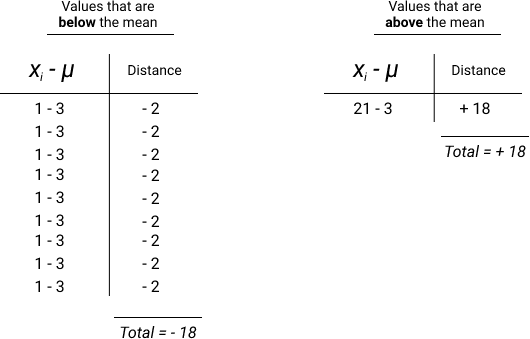

Plugging the distances into the formula we used above will make the numerator amount to 0, which in turn will make the average distance 0:
$$\begin{equation}
average\ distance = \frac{-18 + 18}{10} = \frac{0}{10} = 0
\end{equation}$$

To solve this problem, we can take the absolute value of each distance, and then sum up the absolute values. The absolute value (also called modulus) of a number is the positive version of that number, regardless of its sign. For instance, the absolute value of -7 is +7, and the absolute value of +7 is +7. In mathematical notation we write:

$$\begin{equation}
\left|-7\right| = +7\
\end{equation}$$

$$\begin{equation}
\left|+7\right| = +7
\end{equation}$$

We'll update the formula used previously to reflect the fact the we're summing up the absolute distances instead:

$$\begin{equation}
mean\ absolute \ distance = \frac{
\left|x_1 - \mu\right| +
\left|x_2 - \mu\right| +
... +
\left|x_N - \mu\right|
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
\left|x_i - \mu\right|
}
{N}
\end{equation}$$

We call this measure of variability **mean absolute distance**. In statistical jargon, however, the distance of a value from the mean is called deviation. So the mean absolute distance is more commonly known as **mean absolute deviation** or **average absolute deviation**.

**Exercise**

Write a function that takes in a numerical array and returns the mean absolute deviation. Inside the function:

- Compute the mean of the array.
- Loop through the values of the array. For each iteration:
- Compute the absolute distance (deviation). We can use the `abs()` [function](https://docs.python.org/3/library/functions.html#abs).
- Append the absolute distance to a list.
- Return the mean of the list containing all the absolute distances.
- Compute the mean absolute deviation of distribution C , and assign the result to a variable named `mad`.

In [6]:
def get_mean_absolute_deviation(array):
    ''' Calculates mean absolute deviation of values from mean, in a distribution'''
    abs_distance_from_mean = []
    mean = sum(array)/ len(array)
    
    for value in array:
        distance = abs(value - mean)
        abs_distance_from_mean.append(distance)
    return sum(abs_distance_from_mean)/ len(abs_distance_from_mean) 

In [7]:
C = [1,1,1,1,1,1,1,1,1,21]
mean_absolute_deviation = get_mean_absolute_deviation(C)
mean_absolute_deviation

3.6

### Variance

Above we transformed the distances to absolute values to avoid having the sum of distances amount to 0 in the numerator. Another way to solve this problem is to square each distance and then find the mean of all the squared distances:

$$\begin{equation}
mean\ squared \ distance = \frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
\end{equation}$$

This measure of variability is sometimes called **mean squared distance** or **mean squared deviation** (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as **variance**.

Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability. Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

Consider distribution D=$[2,2,2]$, which has a variance and a mean absolute deviation of 0:

$$\begin{equation}
variance = \frac{
(2-2)^2 +
(2-2)^2 +
(2-2)^2
}
{3} = \frac
{0^2 + 0^2 + 0^2}
{3} = 0
\end{equation}$$

$$\begin{equation}
mean\ absolute\ deviation = \frac{
\left|2-2\right| +
\left|2-2\right| +
\left|2-2\right|
}
{3} = \frac
{0 + 0 + 0}
{3} = 0
\end{equation}$$

**Exercise**

Write a function that takes in a numerical array and returns the variance of that array. Inside the function:

- Compute the mean of the array.
- Loop through the values of the array. For each iteration:
- Compute the squared distance (squared deviation).
- Append the squared distance to a list.
- Return the mean of the list of squared distances.
- Compute the variance of distribution C , and assign the result to a variable named `variance_C`.

In [8]:
def get_variance(array):
    ''' Calculates variance of a distribution'''
    sq_distance_from_mean = []
    mean = sum(array)/ len(array)
    
    for value in array:
        sq_distance = (value - mean)**2
        sq_distance_from_mean.append(sq_distance)
    return sum(sq_distance_from_mean)/ len(sq_distance_from_mean) 

In [9]:
C = [1,1,1,1,1,1,1,1,1,21]
variance_C = get_variance(C)
variance_C

36.0

### Standard Deviation

Above, we got a variance of 36 which was much more than we had expected. This high variability value is the direct result of the squaring process, which makes most distances much bigger than they actually are.

Squaring the distances also has the drawback of squaring the units of measurement. Let's consider this small sample from the Bedroom AbvGr variable (which describes the number of bedrooms in a house): $[0,7,8]$

theoretically we should write out the units of measurement:
$$\begin{equation}
[0\ bedrooms, 7\ bedrooms,8\ bedrooms]
\end{equation}$$

The units of measurement are subject to algebraic operations, so the variance of the sample above will be (b is abv of bedroom below):

$$\begin{equation}
variance = \frac{
(0\ b - 5\ b)^2 +
(7\ b - 5\ b)^2 +
(8 b - 5\ b)^2
}
{3}
\end{equation}$$

$$\begin{equation}
variance = \frac{
25b^2 + 4b^2 + 9b^2
}
{3} = \frac{38b^2}{3} = 12.\bar{6}b^2
\end{equation}$$

The variance of this distribution is $12.\bar{6}\ bedrooms^2$ which is very counterintuitive.

To solve this problem and also reduce the variability value, we can take the square root of variance:

$$\begin{equation}
\sqrt{variance} = \sqrt{12.\bar{6}\ bedrooms^2} = 3.6\ bedrooms
\end{equation}$$

The square root of variance is called **standard deviation** (remember that "deviation" is synonymous with "distance"), and it can be expressed like this in an algebraic definition:

$$\begin{equation}
standard\ deviation = \sqrt{
\frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
}
\end{equation}$$

Notice that the standard deviation is simply the square root of variance:

$$\begin{equation}
standard\ deviation = \sqrt{variance}
\end{equation}$$

**Exercise**

Write a function that takes in a numerical array and returns the standard deviation of that array. Inside the function:

- Compute the mean of the array.
- Loop through the values of the array. For each iteration:
- Compute the squared distance (squared deviation).
- Append the squared distance to a list.
- Compute the mean of the list of squared distances — this is the variance.
- Return the square root of the variance.
- Compute the standard deviation of distribution C, and assign the result to a variable named `standard_deviation_C`

In [10]:
def get_standard_deviation(array):
    ''' Calculates standard deviation of a distribution'''
    sq_distance_from_mean = []
    mean = sum(array)/ len(array)
    
    for value in array:
        sq_distance = (value - mean)**2
        sq_distance_from_mean.append(sq_distance)
    variance = sum(sq_distance_from_mean)/ len(sq_distance_from_mean)
    import math
    return math.sqrt(variance)    

In [11]:
C = [1,1,1,1,1,1,1,1,1,21]
standard_deviation_C = get_standard_deviation(C)
standard_deviation_C

6.0

### Average Variability around the Mean

In practice, standard deviation is perhaps the most used measure of variability. Let's try to get a better understanding of it by measuring the variability of the `SalePrice` variable in our data set. We'll use the get_standard_deviation() function

In [12]:
# mean and standard deviation of SalePrice variable
mean = houses.SalePrice.mean()
print(mean)
std_dev = get_standard_deviation(houses.SalePrice)
print(std_dev)

180796.0600682594
79873.05865192247


Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution. The mean of the SalePrice variable is approximately 180,796. 

The mean tells us that the average price of a house is roughly 180,796, but this doesn't mean that each house (or most of them) costs exactly 180,796. One house could cost 120,000, another 240,000, and it could be that no house actually costs exactly 180,796. The standard deviation gives us a picture about this variability around the mean sale price. So, on average, sale prices vary by roughly 79,873 above and below a mean of 180,796.

Below, we'll try to visualize this variability around the mean by:

- Generating a histogram (KDE plot) for the distribution of the `SalePrice` variable.
- Using vertical lines to mark the mean and the average deviations above and below the mean.

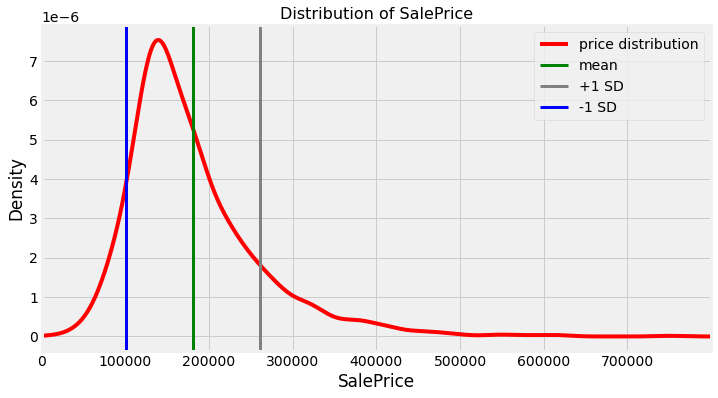

In [13]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
houses['SalePrice'].plot.kde(label = 'price distribution', legend = True, color = 'red', xticks = arange(0, 800000, 100000)  )

# lines indicating mean, and standard deviation
plt.axvline(x = houses['SalePrice'].mean(), ymin = 0, ymax = 1, label = 'mean', linewidth = 3, color = 'green')
plt.axvline(x = mean + std_dev, ymin = 0, ymax = 1, label = '+1 SD', linewidth = 3, color = 'grey')
plt.axvline(x = mean - std_dev, ymin = 0, ymax = 1, label = '-1 SD', linewidth = 3, color = 'blue')
plt.xlim(0,800000)
plt.legend()
plt.xlabel('SalePrice')
plt.title("Distribution of SalePrice", fontsize = 16)
plt.show()

Notice in the histogram that prices can vary around the mean much more or much less than 79,873. Some outliers around 700,000 are more than 500,000 above the mean and a couple of houses around 30,000 are more than 150,000 below the mean. The standard deviation doesn't set boundaries for the values in a distribution: the prices can go above and below the mean more than 79,873.

**Exercise**

The standard deviation of the SalePrice variable should give us a picture about the diversity of prices on the real estate market.
 - Find the year with the greatest variability of prices and assign the answer as an integer to the variable `greatest_variability`.
- Find the year with the lowest variability of prices and assign the answer as an integer to the variable `lowest_variability`.
- Use the function `get_standard_deviation` to measure the standard deviation of each year.
- Information about the years of sale can be found in the `Yr Sold column`.

In [14]:
sales_by_yr = pd.DataFrame(houses.groupby('Yr Sold')['SalePrice'], columns = ['year', 'sales'])

sales_by_yr["SD"] = sales_by_yr['sales'].apply (get_standard_deviation)

print(sales_by_yr[['year','SD']].max())
print(sales_by_yr[['year','SD']].min())
    


year     2010.000000
SD      82553.575636
dtype: float64
year     2006.000000
SD      74521.920712
dtype: float64


In [15]:
# Alternate Solution
years = {}
for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = get_standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Get years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

print(greatest_variability, lowest_variability)

2006 2010


In [51]:
# Another alternate solution
years = houses['Yr Sold'].unique()
standard_deviation_annual= {}
for year in years:
    standard_deviation_annual[year] = get_standard_deviation(houses.groupby('Yr Sold')['SalePrice'].get_group(year))
standard_deviation_annual    

{2010: 74521.920711871,
 2009: 80794.39070298373,
 2008: 75531.94622558328,
 2007: 82483.28433288915,
 2006: 82553.57563561267}

### Standard Deviation as a Measure of Spread
Another way to understand standard deviation is as a measure of spread in a distribution — values in a distribution can be more or less spread. Below, we take four random samples of 50 sample points each from the SalePrice distribution, and plot their histograms to visualize the spread for each sample:

Sample 1:  81785.0811515768 , 185113.3


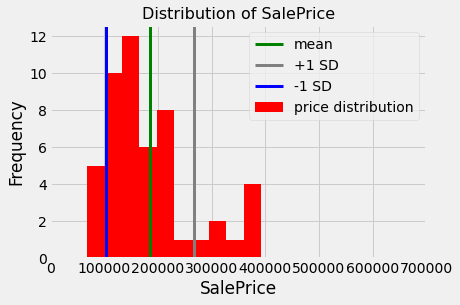

Sample 2:  100370.62998094413 , 183924.78


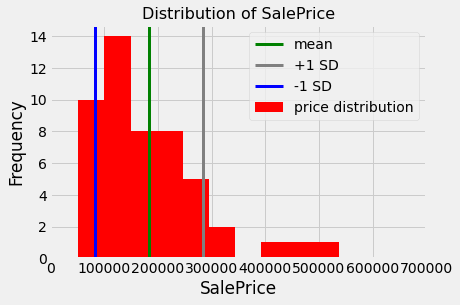

Sample 3:  60676.038515710636 , 174369.8


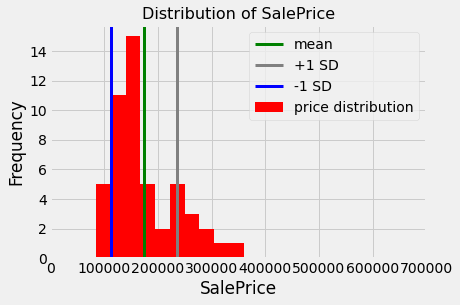

Sample 4:  64436.40016450328 , 172107.8


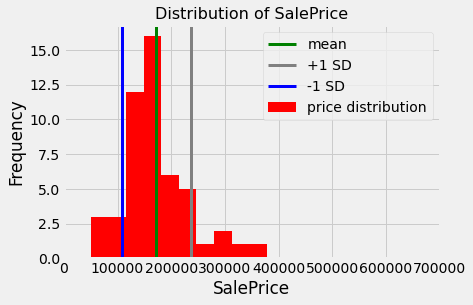

In [67]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    std_dev = get_standard_deviation(sample)
    mean = sample.mean()
    print('Sample ' + str(i) + ': ', std_dev, ',', mean)
    
    plt.style.use('fivethirtyeight')
    sample.plot.hist(label = 'price distribution', legend = True, color = 'red', xticks = arange(0, 800000, 100000)  )

# lines indicating mean, and standard deviation
    plt.axvline(x = sample.mean(), ymin = 0, ymax = 1, label = 'mean', linewidth = 3, color = 'green')
    plt.axvline(x = mean + std_dev, ymin = 0, ymax = 1, label = '+1 SD', linewidth = 3, color = 'grey')
    plt.axvline(x = mean - std_dev, ymin = 0, ymax = 1, label = '-1 SD', linewidth = 3, color = 'blue')
    
    plt.legend()
    plt.xlabel('SalePrice')
    plt.title("Distribution of SalePrice", fontsize = 16)
    plt.show()

Above, it can be seen that sample 2 has the biggest spread, while sample three has the minimum spread. Others are nearly similar. 
Below, we take two samples of 50 sample points each from the distribution of the `Year Built` variable and examine their spread.

Sample 1:  29.239589600403075 , 1.4705882352941178


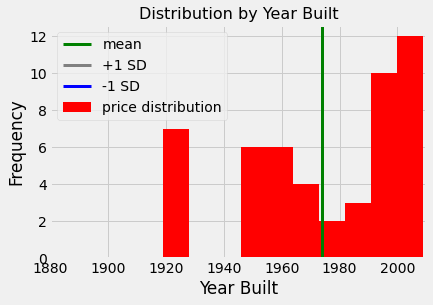

Sample 2:  32.466234767832255 , 1.3513513513513513


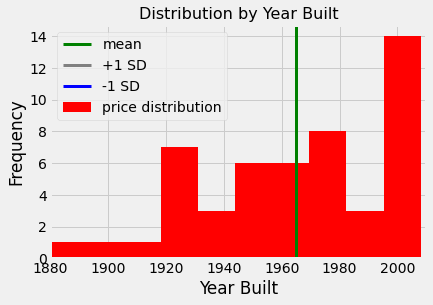

In [92]:
for i in range(1,3):
    sample = houses['Year Built'].sample(50, random_state = i)
    # we used the same random states for the samples in the graph above
    std_dev = get_standard_deviation(sample)
    mean = sum(sample.value_counts())/ len (sample.value_counts())
    print('Sample ' + str(i) + ': ', std_dev, ',', mean)
    
    plt.style.use('fivethirtyeight')
    sample.plot.hist(label = 'Annual distribution', legend = True, color = 'red', xticks = arange(1880, 2010, 20)  )

# lines indicating mean, and standard deviation
    plt.axvline(x = sample.mean(), ymin = 0, ymax = 1, label = 'mean', linewidth = 3, color = 'green')
    plt.axvline(x = mean + std_dev, ymin = 0, ymax = 1, label = '+1 SD', linewidth = 3, color = 'grey')
    plt.axvline(x = mean - std_dev, ymin = 0, ymax = 1, label = '-1 SD', linewidth = 3, color = 'blue')
    plt.xlim(1880, 2010)
    plt.legend()
    plt.xlabel('Year Built')
    plt.title("Distribution by Year Built", fontsize = 16)
    plt.show()

### Sample Standard Deviation

In practice, we generally work with samples, but most of the time we're not actually interested in describing the samples. Rather, we want to use the samples to make inferences about their corresponding populations.

$$\begin{equation}
SD = \sqrt{
\frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
}
\end{equation}$$

Notice in the formula that we used the population mean μ , which means that if we wanted to compute the standard deviation of a sample, we'd have to know μ. In practice, μ  is almost never known, and we can't find it from our sample either, but we can estimate μ using the sample mean x¯.

$$\begin{equation}
SD_{sample} = \sqrt{
\frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n}
}
\end{equation}$$


Below, we can check this is by sampling repeatedly a known population and see how the sample standard deviations compare on average to the population standard deviation.

**Exrercise**

Consider the data for `SalePrice` population and sample it 5000 times. For each of the 5000 iterations of a for loop:

 - Sample 10 data points from the SalePrice variable using the Series.sample() method.
- The `random_state` of `Series.sample()` should be 0 for the first iteration, 1 for the second iteration, 2 for the third, and so on.
- Compute the standard deviation of the sample using the get_standard_deviation() function.
- Append the standard deviation to a list that will eventually store all the 5000 sample standard deviations.
- Generate a histogram using `plt.hist()` to visualize the distribution of the 5000 sample standard deviations.

- Draw a vertical line using plt.axvline() to mark the population standard deviation.
- Examine the histogram and try to figure out whether most sample standard deviations cluster above or below the population standard deviation, or right at the center of it.

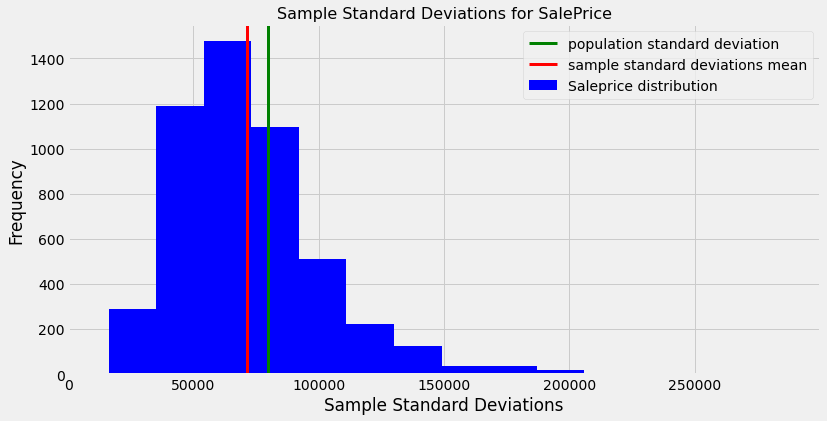

In [102]:
std_devs = []

for i in range(0, 5000):
    sample = houses['SalePrice'].sample(n = 10, random_state = i)
    std_dev = get_standard_deviation(sample)
    std_devs.append(std_dev)
fig = plt.figure(figsize=(12, 6))    
plt.style.use('fivethirtyeight')
pd.Series(std_devs).plot.hist(label = 'Saleprice distribution', legend = True, color = 'blue', xticks = arange(0, 300000, 50000)  )    
plt.axvline(x = get_standard_deviation(houses['SalePrice']), ymin = 0, ymax = 1, label = 'population standard deviation', linewidth = 3, color = 'green')
plt.axvline(x = pd.Series(std_devs).mean(), ymin = 0, ymax = 1, label = 'sample standard deviations mean', linewidth = 3, color = 'red')

plt.xlim(0, 300000)
plt.legend()
plt.xlabel('Sample Standard Deviations')
plt.title("Sample Standard Deviations for SalePrice", fontsize = 16)
plt.show()

### Bessel's Correction

Above, we can see that most sample standard deviations are clustered below the population standard deviation (green line). This suggests that the sample standard deviation usually underestimates the population standard deviation. We can also see that the mean of the 5000 sample standard deviations is below the population standard deviation (red line). 

So we can say that the sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

We can get a good intuition for why the sample standard deviation underestimates if we think in terms of distribution spread. When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard deviation than in the population.

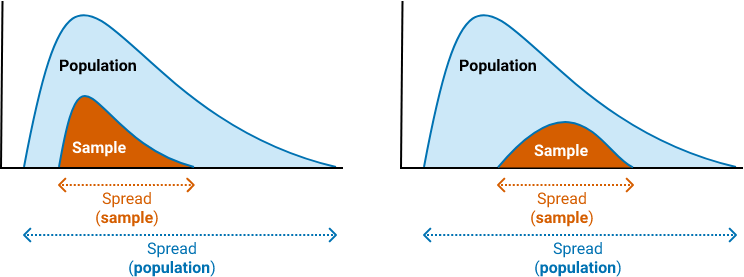

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

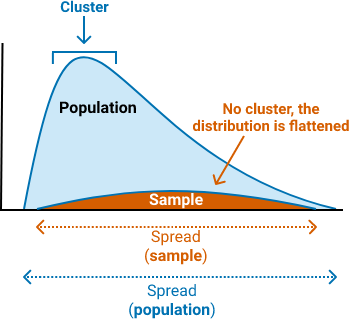

To correct the underestimation problem, we can apply the **"Bessel's correction'** in which the the value of the denominator is decreased (by 1) in the sample standard deviation formula.

$$\begin{equation}
SD_{sample} = \sqrt{
\frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n - 1}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n - 1}
}
\end{equation}$$

Below we modify the code we wrote in the previous exercise by implementing Bessel's correction, and generate the histogram again.

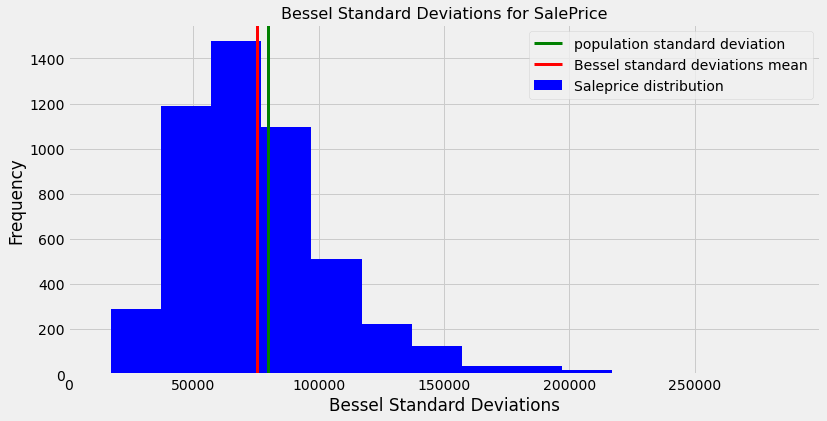

In [104]:
def get_bessel_deviation(array):
    ''' Calculates standard deviation of a distribution'''
    sq_distance_from_mean = []
    mean = sum(array)/ len(array)
    
    for value in array:
        sq_distance = (value - mean)**2
        sq_distance_from_mean.append(sq_distance)
    variance = sum(sq_distance_from_mean)/ (len(sq_distance_from_mean) - 1) # n changed to n-1
    import math
    return math.sqrt(variance)    



std_devs = []

for i in range(0, 5000):
    sample = houses['SalePrice'].sample(n = 10, random_state = i)
    std_dev = get_bessel_deviation(sample)
    std_devs.append(std_dev)
fig = plt.figure(figsize=(12, 6))    
plt.style.use('fivethirtyeight')
pd.Series(std_devs).plot.hist(label = 'Saleprice distribution', legend = True, color = 'blue', xticks = arange(0, 300000, 50000)  )    
plt.axvline(x = get_bessel_deviation(houses['SalePrice']), ymin = 0, ymax = 1, label = 'population standard deviation', linewidth = 3, color = 'green')
plt.axvline(x = pd.Series(std_devs).mean(), ymin = 0, ymax = 1, label = 'Bessel standard deviations mean', linewidth = 3, color = 'red')

plt.xlim(0, 300000)
plt.legend()
plt.xlabel('Bessel Standard Deviations')
plt.title("Bessel Standard Deviations for SalePrice", fontsize = 16)
plt.show()

We can see above that the standard deviations' mean has shifted closer to population standard deviation. 

### Standard Notation

The population standard deviation is denoted with the Greek letter σ (read "sigma", or "lowercase sigma"):

$$\begin{equation}
\sigma = \sqrt{
\frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
}
\end{equation}$$

The population standard deviation σ is just the square root of the population variance. For this reason, the population variance is written as σ2 (such that taking the square root of the variance results in the standard deviationL
$$\begin{equation}
\sigma^2 = \frac{
(x_1 - \mu)^2 +
(x_2 - \mu)^2 +
... +
(x_N - \mu)^2
}{N} = \frac{
\displaystyle\sum_{i = 1}^{N}
(x_i - \mu)^2
}
{N}
\end{equation}$$


The sample standard deviation is simply denoted withs , while the sample variance is denoted withs2 (also notice Bessel's correction in the denominator):

$$\begin{equation}
s = \sqrt{
\frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n - 1}
}
= \sqrt{
\frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n - 1}
}
\end{equation}$$

$$\begin{equation}
s^2 = \frac{
(x_1 - \bar{x})^2 +
(x_2 - \bar{x})^2 +
... +
(x_n - \bar{x})^2
}{n-1} = \frac{
\displaystyle\sum_{i = 1}^{n}
(x_i - \bar{x})^2
}
{n-1}
\end{equation}$$

Pandas and Numpy have builtin functions for calculating variance and standard deviation.

Below, we:
    
Use the `Series.std()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html) to compute the sample standard deviation for the `SalePrice` column. We can use the `ddof` parameter to choose between n and n-1. 
- Save the result to a variable named `pandas_stdev`.
- Use the `numpy.std()` [function](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to compute the sample standard deviation for the SalePrice column. We can use the `ddof` parameter to choose between n and n-1.
- Save the result to a variable named `numpy_stdev`.
- Compare pandas_stdev with numpy_stdev using the == operator. Assign the result of the comparison to a variable named `equal_stdevs`.

Use the `Series.var()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.var.html) to compute the sample variance for the SalePrice column. 
- Assign the result to `pandas_var`.
- Use the `numpy.var()` [function](https://numpy.org/doc/stable/reference/generated/numpy.var.html) to compute the sample variance for the `SalePrice` column. Assign the result to `numpy_var`.
- Compare `pandas_var` with `numpy_var` using the `==` operator. Assign the result of the comparison to a variable named `equal_vars`.    

In [106]:
sample = houses.sample(100, random_state = 1)

pandas_stdev = sample.SalePrice.std(ddof = 1)
numpy_stdev = np.std(sample.SalePrice, ddof = 1)
pandas_var = sample.SalePrice.var(ddof=1)
numpy_var = np.var(sample.SalePrice, ddof = 1)

equal_stdevs = pandas_stdev == numpy_stdev
equal_vars = pandas_var == numpy_var

print(equal_stdevs, equal_vars)

True True


### Sample Variance - Unbiased Estimator

We call a statistic an unbiased estimator when that statistic is equal on average to the parameter it estimates. The sample mean ¯x  is an unbiased estimator for the population mean μ  no matter whether we sample with or without replacement. 

However, **The sample variance s2 is an unbiased estimator for the population variance only when we sample with replacement**. In the diagram below, we will:

- Take all possible samples of size n=2 from the population $[0,3,6]$ with $\sigma^2 = 6$
- Compute the sample variance $s**2$ for for each sample.
- Take the mean of all the sample variances $s**2$, We can see that the mean is 6, which is the same as the population variance, which shows that the sample variance is an unbiased estimator for the population variance.

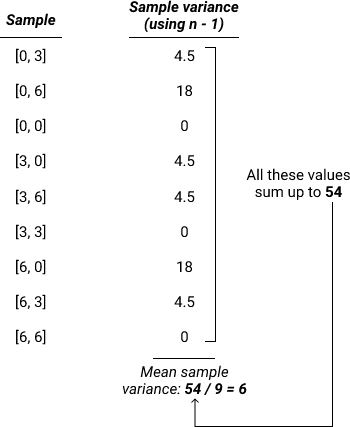


Although the sample variance is an unbiased estimator, the standard deviation is not an unbiased estimator. For the above population $\sigma = 2.45$ but the mean of all possible sample standard deviations comes out to about 1.89.

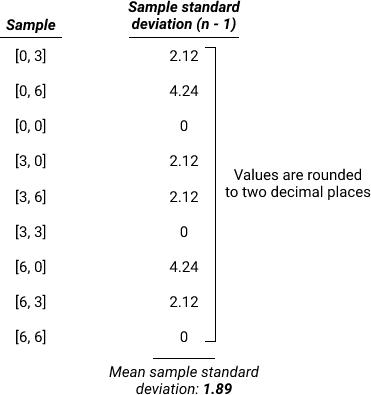

**Exercise**

Below, we consider all possible samples for the population $[0, 3, 6]$ when we **sample without replacement**:

- Compute the sample variance and sample standard deviation for each sample.
- Take the mean of all the sample variances. Compare the mean variance with the population variance (which we'll have to compute) using the `==` operator, and assign the result to a variable `equal_var`.
- If the sample variance is biased in this case, the result should be `False`.
- Take the mean of all the sample standard deviations. Compare the mean standard deviation with the population standard deviation using the `==` operator, and assign the result to `equal_stdev`.
- If the sample variance is biased in this case, the result should be `False`.

In [110]:
population = [0, 3, 6]
samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]
pop_variance = pd.Series(population).var(ddof = 0)
pop_stdev = pd.Series(population).std(ddof = 0)
sample_variance = []
sample_stdev = []

for sample in samples:
    variance = pd.Series(sample).var(ddof = 1)
    stdev = pd.Series(sample).std(ddof = 1)
    sample_variance.append(variance)
    sample_stdev.append(stdev)
    
mean_sample_variance = pd.Series(sample_variance).mean()
mean_sample_stdev = pd.Series(sample_stdev).mean()  

equal_var = pop_variance == mean_sample_variance
equal_stdev = pop_stdev == mean_sample_stdev

print(equal_var, equal_stdev)

False False


We can see above that variance is an **unbiased estimator** only when sampled with replacement. 